# Car stock analysis using Python

### Importing packages
We will start off by importing the necessary packages and libraries which will be need for the data analysis and visualization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Next we will import the packages necessary for getting the data. Pandas datareader will be used to extract data.

In [2]:
import pandas_datareader
import datetime
import pandas_datareader.data as web

### Obtaining data
Now we will obtain the data for the car companies which will be analyzed. The start date and end date will be mentioned and in that period the analysis will be carried out.

In [3]:
start = datetime.datetime(2015,1,1)
end = datetime.datetime(2020,1,1)

The car companies which will be considered are Toyota, BMW and Tesla. So the data in the required period is extracted from the web.

In [4]:
toyota = web.DataReader('TM','yahoo',start,end)
toyota.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,126.209999,125.400002,125.599998,125.480003,151100.0,117.960808
2015-01-02,126.639999,124.889999,126.230003,125.669998,250000.0,118.139420
2015-01-05,124.610001,123.050003,124.440002,123.370003,240600.0,115.977257
2015-01-06,123.720001,121.209999,123.400002,122.099998,285600.0,114.783340
2015-01-07,126.059998,125.059998,125.519997,125.169998,385700.0,117.669388


In [5]:
bmw = web.DataReader('BMWYY','yahoo',start,end)
bmw.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,36.400002,35.610001,36.349998,35.619999,39000.0,27.612242
2015-01-02,35.340000,35.060001,35.279999,35.279999,33100.0,27.348680
2015-01-05,34.060001,33.610001,34.049999,33.849998,59300.0,26.240156
2015-01-06,34.500000,33.869999,34.259998,33.910000,298700.0,26.286671
2015-01-07,34.340000,33.810001,34.040001,34.240002,120400.0,26.542484


In [6]:
tesla = web.DataReader('TSLA','yahoo',start,end)
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,45.136002,44.450001,44.618000,44.481998,11487500,44.481998
2015-01-02,44.650002,42.652000,44.574001,43.862000,23822000,43.862000
2015-01-05,43.299999,41.431999,42.910000,42.018002,26842500,42.018002
2015-01-06,42.840000,40.841999,42.012001,42.256001,31309500,42.256001
2015-01-07,42.956001,41.956001,42.669998,42.189999,14842000,42.189999


### Visualization of data
The trends in the stipulated time period will be visualized through plots and gain insights. Starting with a linear plot of the open proce of all the 3 stocks.

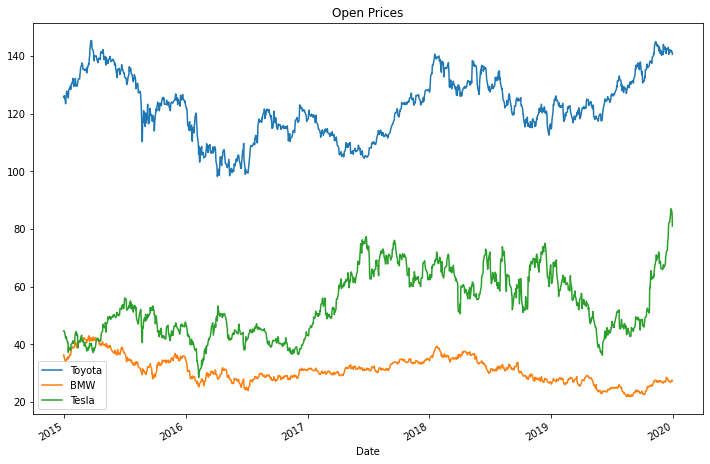

In [7]:
toyota['Open'].plot(label='Toyota',title='Open Prices',figsize=(12,8))
bmw['Open'].plot(label='BMW')
tesla['Open'].plot(label='Tesla')
plt.legend()

As seen in the above plot, the opening prices for Toyota is high as compared to the other two companies.

Next plotting the volume of stock that is traded each day.

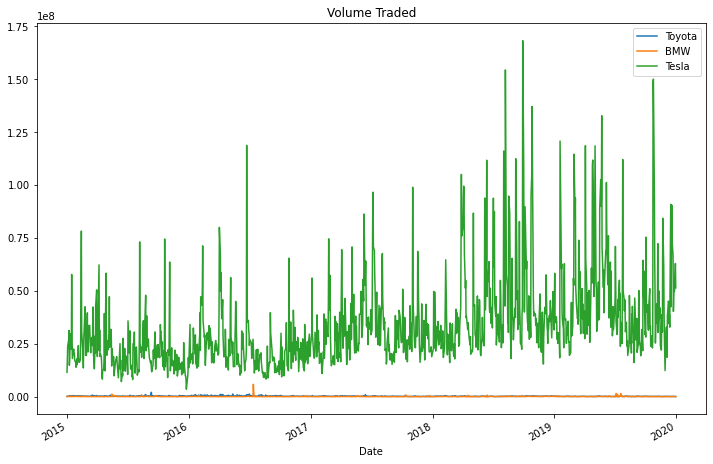

In [8]:
toyota['Volume'].plot(label='Toyota',title='Volume Traded',figsize=(12,8))
bmw['Volume'].plot(label='BMW')
tesla['Volume'].plot(label='Tesla')
plt.legend()

We gain gain the insight that Tesla had a huge spike reaching a high volume trade somewhere in the late 2018. So let's find out the exact date when the volume of trade was the highest.

In [9]:
m = tesla['Volume'].max()
tesla.loc[tesla['Volume']==m]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-09-28,55.599998,52.112,54.051998,52.953999,168248500,52.953999


According to the abpve plots it feels like Tesla has been at a better position than the other two companies. But the claer picture will be seen when not only the stocks are considered but also the total market cap. A easy way to do this is to calculate the total money traded by multiplying the volume with the open price. So another column is created of 'Total trade amount'.

In [10]:
toyota['Total trade amount'] = toyota['Open']*toyota['Volume']
bmw['Total trade amount'] = bmw['Open']*bmw['Volume']
tesla['Total trade amount'] = tesla['Open']*tesla['Volume']

Now the total amount traded will be plot to see its trend.

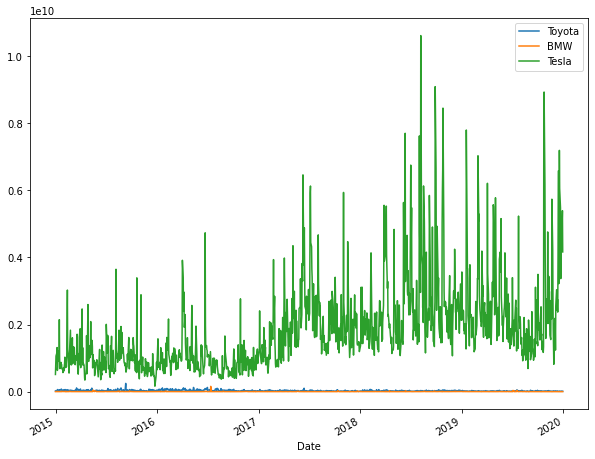

In [11]:
toyota['Total trade amount'].plot(label='Toyota',figsize=(10,8))
bmw['Total trade amount'].plot(label='BMW')
tesla['Total trade amount'].plot(label='Tesla')
plt.legend()

Here we can observe a huge spike somehwere in the mid 2018 where a huge amount of amount was traded. So let's obtain the exact date it happened.

In [12]:
m1 = tesla['Total trade amount'].max()
tesla.loc[tesla['Total trade amount']==m1]

,High,Low,Open,Close,Volume,Adj Close,Total trade amount
Date,,,,,,,
2018-08-07,77.491997,67.830002,68.767998,75.914001,154379000,75.914001,1.061633e+10


When you search for this date on the web you will find that the surge happened because Elon Musk stated that Tesla may go private.

Just looking into the companies Toyota and BMW since Tesla is on a higher scale.

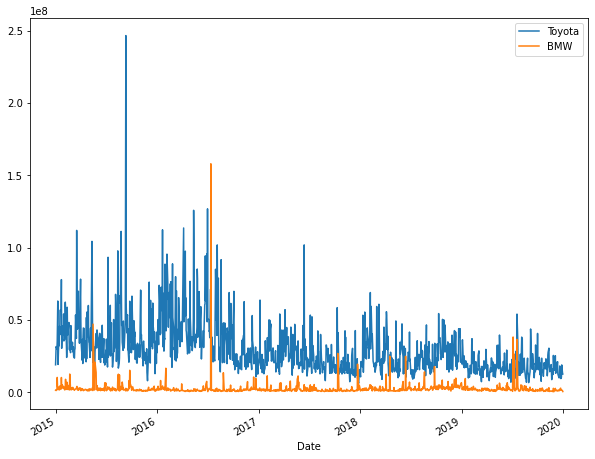

In [13]:
toyota['Total trade amount'].plot(label='Toyota',figsize=(10,8))
bmw['Total trade amount'].plot(label='BMW')
plt.legend()

There was a spike for Toyota too in the mid 2015 and in the mid 2016 for BMW.

Now let's move on to plotting the moving averages. Let's tale the BMW data and plot the moving average for 50 days and 250 days.

<AxesSubplot:xlabel='Date'>

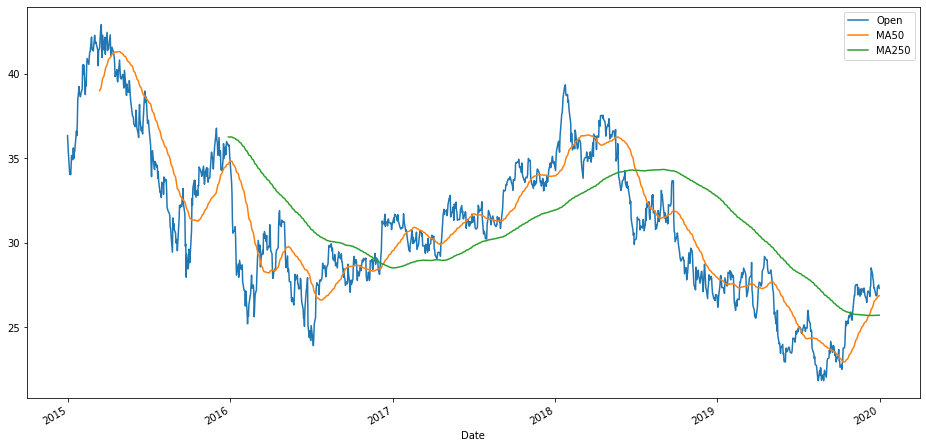

In [14]:
bmw['MA50'] = bmw['Open'].rolling(50).mean()
bmw['MA250'] = bmw['Open'].rolling(250).mean()
bmw[['Open','MA50','MA250']].plot(figsize=(16,8))

While doing stock analysis, the candlestick chart is most very widely. So let's get to plotting the candlestick chart for the car company Toyota. The candlestick package has to be used and so for that the mplfinance module is installed. It has a type argument which plots candlesticks.

In [15]:
#!pip install mplfinance

In [16]:
import mplfinance as mpf

We extract the dates of a the month May from the year 2016 and plot the candlestick chart for this interval.

In [17]:
toyota_month = toyota['2016-05-01' :'2016-06-01']

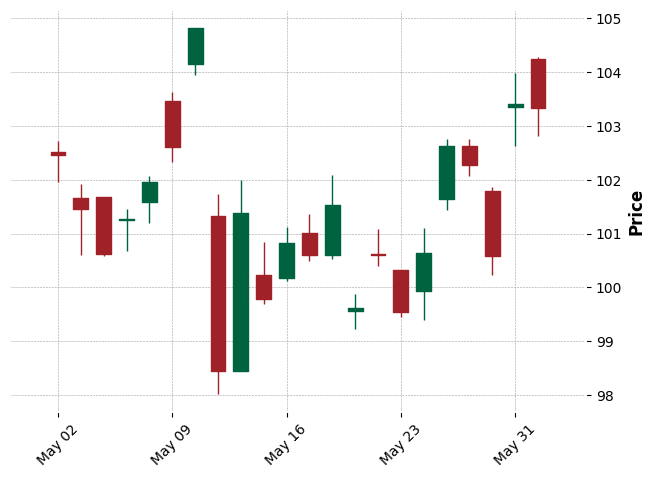

In [18]:
mpf.plot(toyota_month,type='candle',style='charles')

If you want to show the volume traded then just set the argument volume to true.

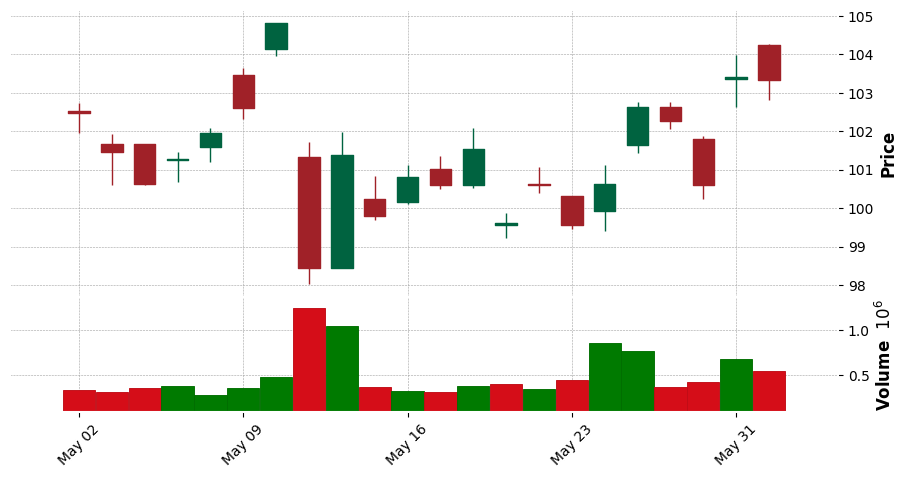

In [19]:
mpf.plot(toyota_month,type='candle',style='charles',volume=True,figratio=(10,5))

### Financial analysis
Now we will look into some techincal financial terms and its calculations. 

The first term is the daily percentage change. The formula for it is as follows: r(t) = (p(t)/p(t-1)) - 1 where r(t) is return at time t and p(t) is price at time t. This helps in determining the percentage gain or loss and to analyze the volatility of the stock. Volatility is the ,easure of the dispersion of the returns from a stock. So if the stock rises and falls more than 1% for a period of time then it is called as a volatile market. So when we plot a histogram and the distribution is wide then we can say its more volatile.

So now a column 'return' is created which is calculated using the close proce column. For time (t-1), the 'shift' method is used to shift down/forward by period 1.

In [21]:
toyota['returns'] = (toyota['Close']/toyota['Close'].shift(1))-1
bmw['returns'] = (bmw['Close']/bmw['Close'].shift(1))-1
tesla['returns'] = (tesla['Close']/tesla['Close'].shift(1))-1

Now we will plot the histogram.

<AxesSubplot:>

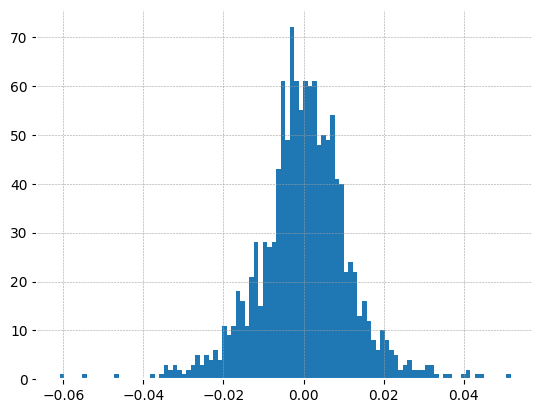

In [24]:
toyota['returns'].hist(bins=100)

<AxesSubplot:>

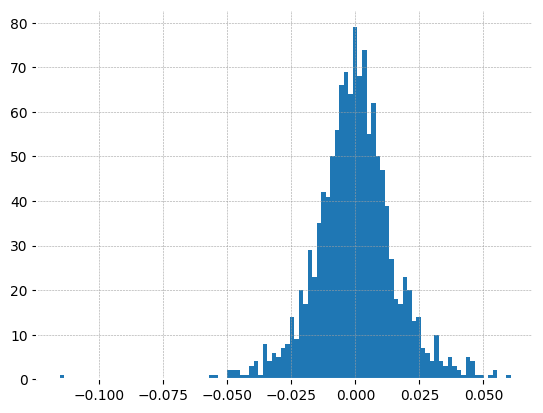

In [25]:
bmw['returns'].hist(bins=100)

<AxesSubplot:>

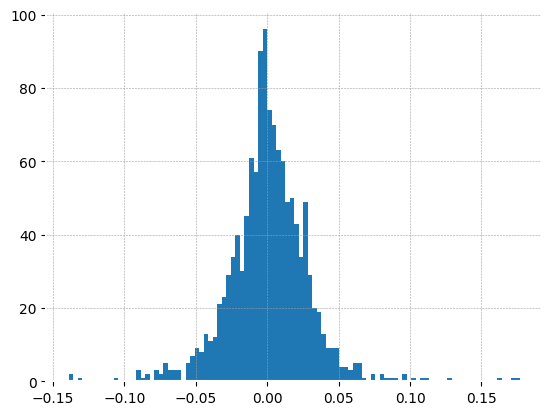

In [26]:
tesla['returns'].hist(bins=100)

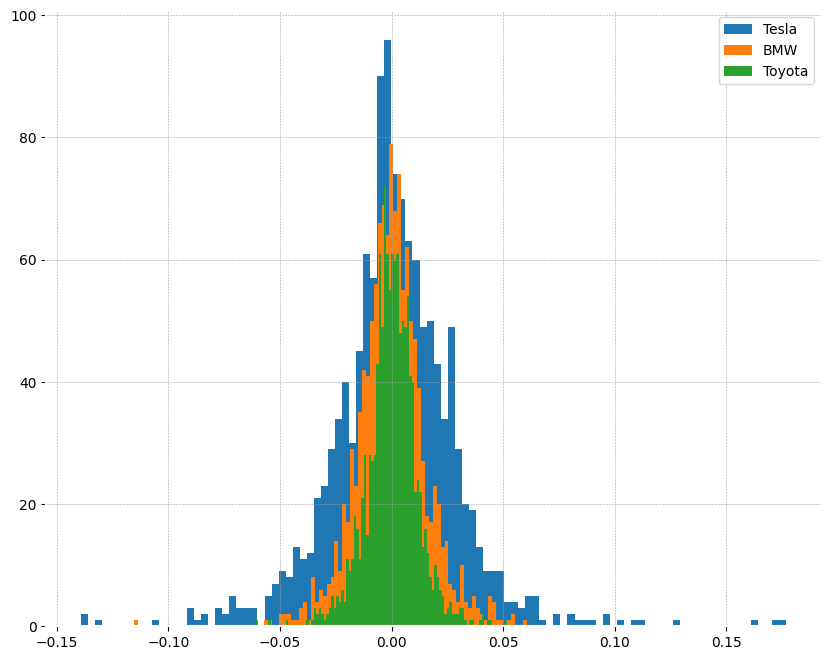

In [30]:
tesla['returns'].hist(bins=100, label='Tesla',figsize=(10,8))
bmw['returns'].hist(bins=100, label='BMW',figsize=(10,8))
toyota['returns'].hist(bins=100, label='Toyota',figsize=(10,8))
plt.legend()

As seen from the above plot, toyota and BMW is little stable but Tesla has volatility because it has a wide distribution.

We can get a better insight from kernel density estimation (KDE) plot.

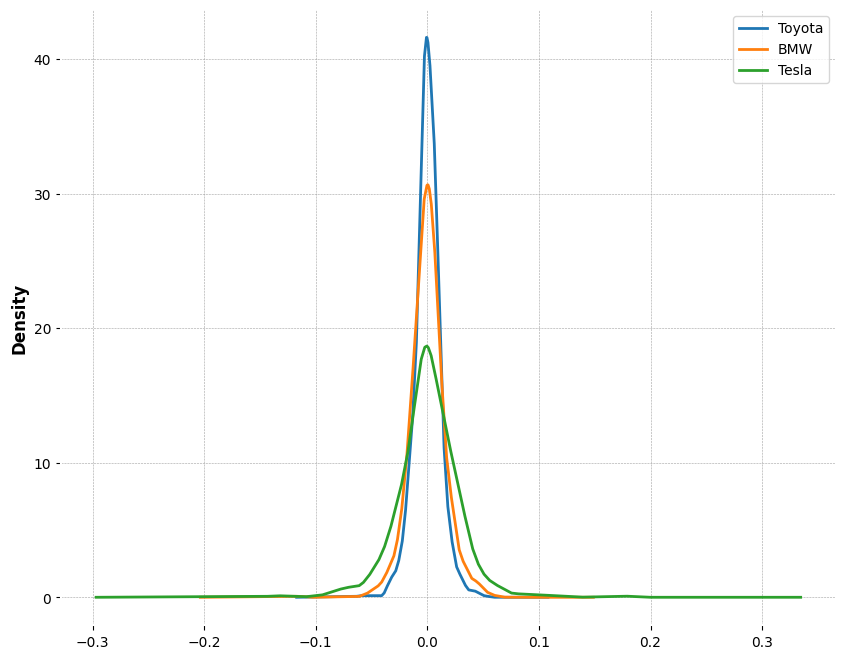

In [32]:
toyota['returns'].plot(kind='kde', label='Toyota',figsize=(10,8))
bmw['returns'].plot(kind='kde', label='BMW',figsize=(10,8))
tesla['returns'].plot(kind='kde', label='Tesla',figsize=(10,8))
plt.legend()

As seen from the plot, the distribution of Toyota reaches a peak and idicates that its very stable compared to the stocks of toher two companies.

Now we can compare the returns between the stocks to analyse the correlation between them. This can be done by creating scatter plots. The scatter_matrix method is imported from pandas. To be able to create the plot, we need to create a dataframe with the columns as the returns for each of the stock.

In [34]:
from pandas.plotting import scatter_matrix

In [35]:
comp_df = pd.concat([toyota['returns'],bmw['returns'],tesla['returns']],axis=1)
comp_df.columns = ['Toyota returns','BMW returns','Tesla returns']

array([[<AxesSubplot:xlabel='Toyota returns', ylabel='Toyota returns'>,
        <AxesSubplot:xlabel='BMW returns', ylabel='Toyota returns'>,
        <AxesSubplot:xlabel='Tesla returns', ylabel='Toyota returns'>],
       [<AxesSubplot:xlabel='Toyota returns', ylabel='BMW returns'>,
        <AxesSubplot:xlabel='BMW returns', ylabel='BMW returns'>,
        <AxesSubplot:xlabel='Tesla returns', ylabel='BMW returns'>],
       [<AxesSubplot:xlabel='Toyota returns', ylabel='Tesla returns'>,
        <AxesSubplot:xlabel='BMW returns', ylabel='Tesla returns'>,
        <AxesSubplot:xlabel='Tesla returns', ylabel='Tesla returns'>]],
      dtype=object)

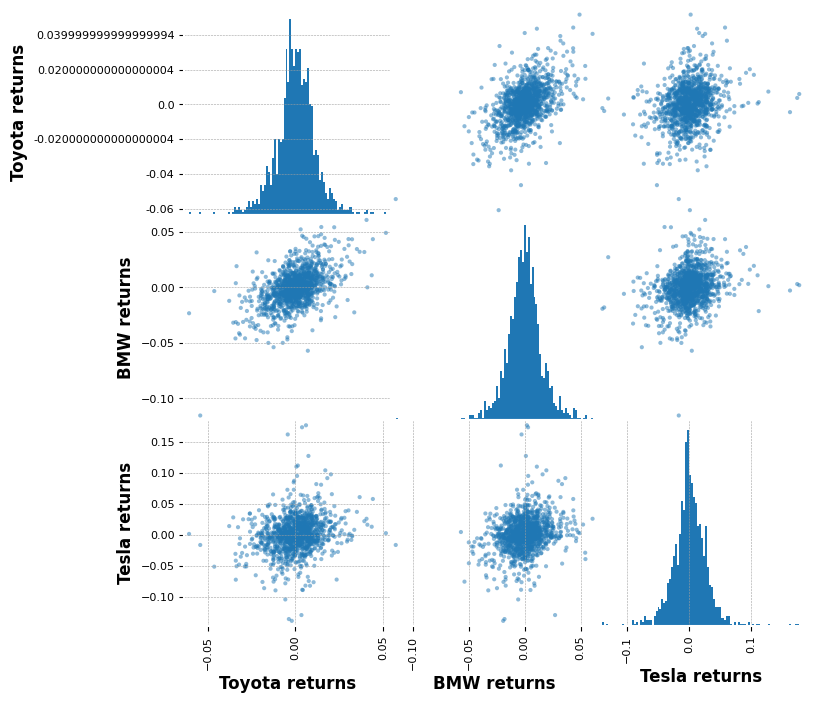

In [37]:
scatter_matrix(comp_df,figsize=(8,8),hist_kwds={'bins':100})

We can draw an insight that there is a correlation between BMW and Toyota but Tesla does not relate to any company.

Now we will analyze the cumulative returns. Cumulative means the aggregation of values (here: stock amount) over a period of time. So when considering cumulative return, it is calculated according to the day the investment was made unlike the daily return where it is calculated according to the previous day. If the cumulative return is above 1, profit is generated otherwise it's a loss. 

The formula is: i(i) = (1+r(t)).i(t-1) where i(t) is investement at time t and r(t) is return at time t. We will use the pandas 'cumprod()' method to calculate it. 

In [39]:
toyota['cumulative return'] = (1 + toyota['returns']).cumprod()
bmw['cumulative return'] = (1 + bmw['returns']).cumprod()
tesla['cumulative return'] = (1 + tesla['returns']).cumprod()

Now we will plot the cumulative returns and see which stocks had the highest return.

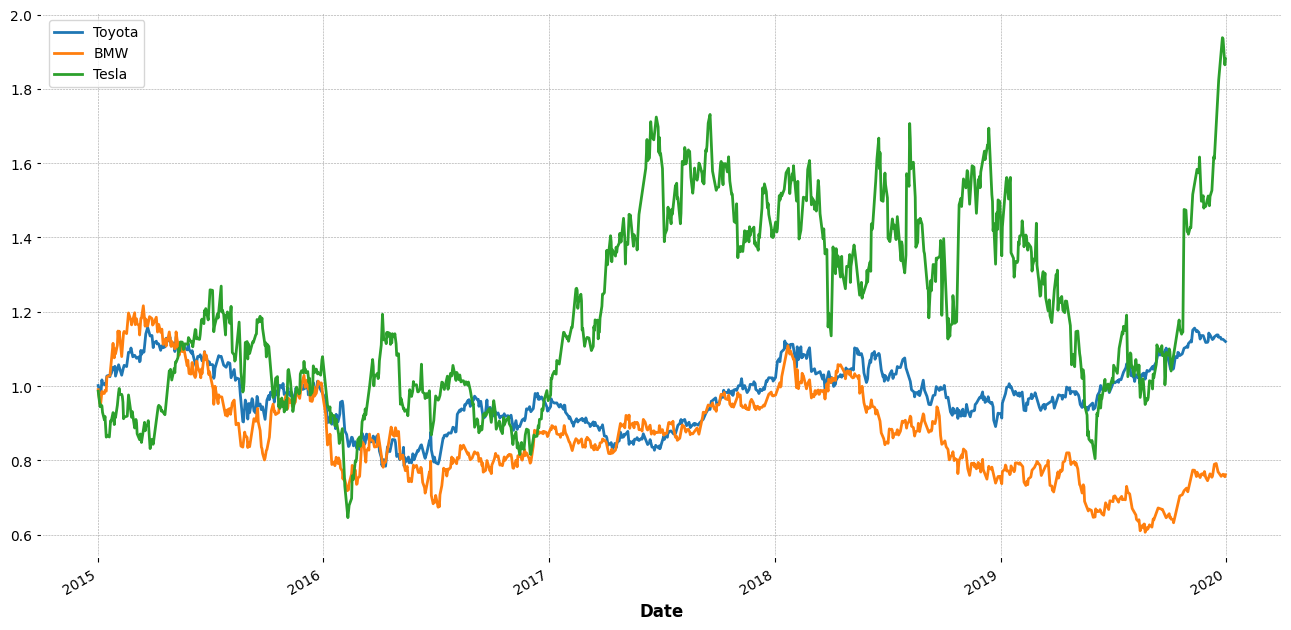

In [41]:
toyota['cumulative return'].plot(label='Toyota',figsize=(16,8))
bmw['cumulative return'].plot(label='BMW')
tesla['cumulative return'].plot(label='Tesla')
plt.legend()

We can assert that Tesla had the largest cumulative return whereas BMW had the lowest return.